In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle


#1.Extract features values and Image Ids from the data:
dataset = pd.read_csv("wdbc.dataset",header = None)

print(dataset.groupby([1]).size())

dataset[1]=dataset[1].map({'B':0,'M':1})

X = dataset.iloc[:,2:32].values 
Y = dataset.iloc[:,1].values 

X_normalized = np.linalg.norm(X,axis=1,keepdims=True)
X=X/X_normalized

1
B    357
M    212
dtype: int64



epoch = 10000 and learningrate = 0.1

Training dataset

[[265   4]
 [ 49 137]]

Training_Accuracy =  0.8835164835164835

Training_Precision =  0.9851301115241635

Training_Recall =  0.8439490445859873

Validation dataset

[[43  0]
 [ 3 11]]

Validation_Accuracy =  0.9473684210526315

Validation_Precision =  1.0

Validation_Recall =  0.9347826086956522


Text(0,0.5,'Cost')

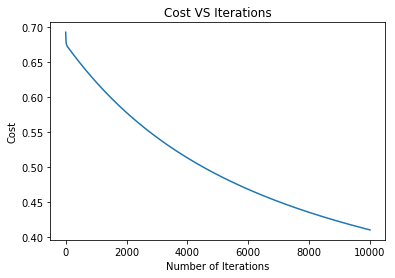

In [15]:
#2. Data Partitioning:
dataset = shuffle(dataset) 
dataset.reset_index(drop=True)
X_training, X_testing, X_validation  = np.split(X, [int(.8*len(X)), int(.9*len(X))])
Y_training, Y_testing, Y_validation  = np.split(Y, [int(.8*len(Y)), int(.9*len(Y))])


#3.Training using Logistic Regression:
X_training,Y_training=X_training.T,Y_training.reshape(1,Y_training.shape[0])
X_testing,Y_testing=X_testing.T,Y_testing.reshape(1,Y_testing.shape[0])
X_validation,Y_validation=X_validation.T,Y_validation.reshape(1,Y_validation.shape[0])

def sigmoid(z): 
    return 1 / (1 + np.exp(-z))


def regression(X_value_matrix,epochs,learningrate):
    global w,b, losstrack
    losstrack = [] 
      
    m = X_training.shape[1]
    w = np.random.randn(X_training.shape[0], 1)*0.01
    b = 0 
   
    for epoch in range(epochs):
        z = np.dot(w.T, X_training) + b
        p = sigmoid(z)
        cost = -np.sum(np.multiply(np.log(p), Y_training) + np.multiply((1 - Y_training), np.log(1 - p)))/m
        losstrack.append(cost)
        dz = p-Y_training
        dw = (1 / m) * np.dot(X_training, dz.T)
        db = (1 / m) * np.sum(dz)
        w = w - learningrate * dw
        b = b - learningrate * db


def prediction(X_value_matrix):
    z = np.dot(w.T, X_value_matrix) + b
    p = sigmoid(z)
    p_new = (p>0.5).astype(int)
    return p_new



regression(X_training,epochs = 10000,learningrate=0.1)

Y_training_predicted=(prediction(X_training))
Y_validation_predicted=(prediction(X_validation))
Y_testing_predicted=(prediction(X_testing))

print("\nepoch = 10000 and learningrate = 0.1")

print("\nTraining dataset\n")

matrix = confusion_matrix(Y_training[0], Y_training_predicted[0])
Training_Accuracy = (matrix[0,0] + matrix[1,1]) / (matrix[0,0]+matrix[0,1]+matrix[1,0]+matrix[1,1])
Training_Precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
Training_Recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])

print(confusion_matrix(Y_training[0], Y_training_predicted[0]))
print("\nTraining_Accuracy = ", Training_Accuracy)
print("\nTraining_Precision = ", Training_Precision)
print("\nTraining_Recall = ", Training_Recall)

print("\nValidation dataset\n")

matrix = confusion_matrix(Y_validation[0], Y_validation_predicted[0])
Validation_Accuracy = (matrix[0,0] + matrix[1,1]) / (matrix[0,0]+matrix[0,1]+matrix[1,0]+matrix[1,1])
Validation_Precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
Validation_Recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])

print(confusion_matrix(Y_validation[0], Y_validation_predicted[0]))
print("\nValidation_Accuracy = ", Validation_Accuracy)
print("\nValidation_Precision = ", Validation_Precision)
print("\nValidation_Recall = ", Validation_Recall)



plt.plot(losstrack)
plt.title('Cost VS Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')

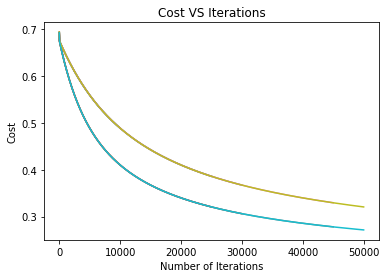

In [28]:
#4.Tuning hyper-parameters:
list_epoch = [10000,25000,30000,45000,50000]
list_learningrate = [0.05,0.1]

for i in list_epoch:
    for j in list_learningrate:
        regression(X_training,i,j)
        Y_training_predicted=(prediction(X_training))
        Y_validation_predicted=(prediction(X_validation))
        

        plt.plot(losstrack)
        plt.title('Cost VS Iterations')
        plt.xlabel('Number of Iterations')
        plt.ylabel('Cost')

BEST CASE:

epochs = 40000 & learningrate = 0.1

Training data set

[[261   8]
 [ 32 154]]

Training_Accuracy =  0.9120879120879121

Training_Precision =  0.9702602230483272

Training_Recall =  0.8907849829351536

Testing Data set

[[42  3]
 [ 3  9]]

Testing_Accuracy =  0.8947368421052632

Testing_Precision =  0.9333333333333333

Testing_Recall =  0.9333333333333333

Validation dataset

[[40  3]
 [ 2 12]]

Validation_Accuracy =  0.9122807017543859

Validation_Precision =  0.9302325581395349

Validation_Recall =  0.9523809523809523


Text(0,0.5,'Cost')

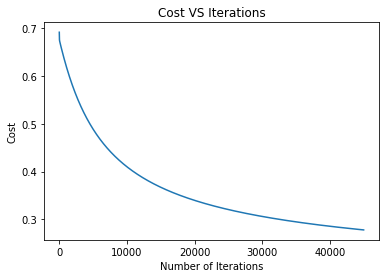

In [27]:
#Testing machine learning scheme on the testing set:
regression(X_training,epochs = 45000,learningrate=0.1)
Y_training_predicted=(prediction(X_training))
Y_validation_predicted=(prediction(X_validation))
Y_testing_predicted=(prediction(X_testing))
print("BEST CASE:")

print("\nepochs = 45000 & learningrate = 0.1")

print("\nTraining data set\n")

matrix = confusion_matrix(Y_training[0], Y_training_predicted[0])
Training_Accuracy = (matrix[0,0] + matrix[1,1]) / (matrix[0,0]+matrix[0,1]+matrix[1,0]+matrix[1,1])
Training_Precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
Training_Recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])

print(confusion_matrix(Y_training[0], Y_training_predicted[0]))
print("\nTraining_Accuracy = ", Training_Accuracy)
print("\nTraining_Precision = ", Training_Precision)
print("\nTraining_Recall = ", Training_Recall)


print("\nTesting Data set\n")

matrix = confusion_matrix(Y_testing[0], Y_testing_predicted[0])
Testing_Accuracy = (matrix[0,0] + matrix[1,1]) / (matrix[0,0]+matrix[0,1]+matrix[1,0]+matrix[1,1])
Testing_Precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
Testing_Recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])

print(confusion_matrix(Y_testing[0], Y_testing_predicted[0]))
print("\nTesting_Accuracy = ", Testing_Accuracy)
print("\nTesting_Precision = ", Testing_Precision)
print("\nTesting_Recall = ", Testing_Recall)


print("\nValidation dataset\n")

matrix = confusion_matrix(Y_validation[0], Y_validation_predicted[0])
Validation_Accuracy = (matrix[0,0] + matrix[1,1]) / (matrix[0,0]+matrix[0,1]+matrix[1,0]+matrix[1,1])
Validation_Precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
Validation_Recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])

print(confusion_matrix(Y_validation[0], Y_validation_predicted[0]))
print("\nValidation_Accuracy = ", Validation_Accuracy)
print("\nValidation_Precision = ", Validation_Precision)
print("\nValidation_Recall = ", Validation_Recall)

plt.plot(losstrack)
plt.title('Cost VS Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')